In [1]:
from fastai.vision import *

### Pixel Similarity

A straightforward approach might be to find an 'average' for each number.  Each of these 'averages' can then be compared with an unseen number and we can predict that the unseen number will be the one that it is most similar to.  We can use the training data to calculate the averages.  To determine the similarity we could compare each pixel and sum the differences to find a similarity value and simply selecting the number with the smallest value to be our prediction.

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

[PosixPath('/home/calum/.fastai/data/mnist_png/training'),
 PosixPath('/home/calum/.fastai/data/mnist_png/testing'),
 PosixPath('/home/calum/.fastai/data/mnist_png/models')]

In [7]:
train = (path/'training')
train.ls()

[PosixPath('/home/calum/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/calum/.fastai/data/mnist_png/training/9')]

In [16]:
ones = (train/'1').ls()
len(ones)

6742

torch.Size([1, 28, 28])

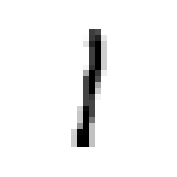

In [92]:
img = open_image(ones[0], convert_mode='L') # First example of a 1
img.show(cmap='binary')
img.shape

In [81]:
df = pd.DataFrame(image2np(img.data)[3:25,3:24])
df.style.set_properties(**{'font-size':'4pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760784,0.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.768627,0.862745,0.105882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109804,0.862745,0.996078,0.192157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756863,0.996078,0.192157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756863,0.996078,0.192157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756863,0.996078,0.192157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043137,0.800000,0.996078,0.192157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345098,0.996078,0.796078,0.062745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333,0.996078,0.701961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Here I'll show how you can calculate an average
These averaged digits are called <u>centroids</u>

In [109]:
one_tensors = [open_image(o, convert_mode='L').data for o in ones]
len(one_tensors)

6742

In [110]:
stacked_ones = torch.stack(one_tensors)
stacked_ones.shape

torch.Size([6742, 1, 28, 28])

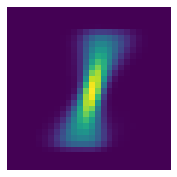

In [111]:
avg = stacked_ones.mean(0)
Image(avg).show()